# Car Advertisement Analysis

## Introduction
<a name="introduction"></a>

A set of vehicle advertisement's data have been provided for analysis on the relations between various factors of a vehicle and their influence on the price. The dataset will be processed to avoid or minimise skewed analysis, and exploratory data analysis will be conducted in order to reach some conclusions. This report will consist of the following:

1. General information on the dataset
2. Data preprocessing stages, replacing missing values, categorising data and adding other relevant variables
3. Exploratory data analysis on the relations between vehicle's listing price and various vehicle's characteristics such as models, condition, vehicle's age, average mileage

Based on the conclusions drawn in this report, it will help Crankshaft List executives to make the relevant decisions on developing the listing platform.

### Table of contents
1. [Introduction](#introduction)
2. [Data Preprocessing](#dpp)
3. [Exploratory Data Analysis](#eda)
4. [Price Determining Factors Analysis](#factor)
5. [Conclusion](#cons)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
#read the .csv file
try:
    ad_data = pd.read_csv('vehicles_us.csv')
except:
    ad_data = pd.read_csv('/datasets/vehicles_us.csv')

In [3]:
#see the general information of the dataset
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
#see the first rows of the dataset
ad_data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [5]:
#see the description of the dataset to start identifying outliers
ad_data.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


### Conclusion

General Info on the Dataset:


1. The dataset has 13 columns, consisting of quantitative and categorical data.
2. There is no advertisement ID column which means that people may list the same vehicle multiple times.
3. There are some missing values in several columns, some of them have pretty big percentage that may skew the data if dropped or filled randomly.
4. Just by looking at the descriptive table above, there are some obvious outliers in the data that we will process at a later stage. 

By initially looking at the dataset and general information about the data, the structure of the data is starting to show. We can now proceed to process the data for the missing values, data categorisation and outliers identification and removal to prepare us for further analysis.

## Data preprocessing
<a name="dpp"></a>

### Missing Values

In [6]:
#check the percentage of missing values in the dataset
report = ad_data.isna().sum().to_frame()
report = report.rename(columns = {0: 'missing_values'})
report['% of total'] = (report['missing_values'] / ad_data.shape[0]).round(2) * 100
report.sort_values(by = 'missing_values', ascending = False)

,missing_values,% of total
is_4wd,25953,50.0
paint_color,9267,18.0
odometer,7892,15.0
cylinders,5260,10.0
model_year,3619,7.0
price,0,0.0
model,0,0.0
condition,0,0.0
fuel,0,0.0
transmission,0,0.0


In [7]:
ad_data['is_4wd'].unique()

array([ 1., nan])

As is_4wd column has boolean values, the filled in values are all 1 so it makes sense that the missing ones are 0.

In [8]:
ad_data['is_4wd'] = ad_data['is_4wd'].fillna('0').astype('int')

In [9]:
ad_data['paint_color'].unique()

array([nan, 'white', 'red', 'black', 'blue', 'grey', 'silver', 'custom',
       'orange', 'yellow', 'brown', 'green', 'purple'], dtype=object)

We can see that paint_color is a categorical variable and the color is not significant to our analysis, therefore I will fill in with generic value like "unknown".

In [10]:
ad_data['paint_color'] = ad_data['paint_color'].fillna('unknown')

In [11]:
ad_data['model_year'].unique()

array([2011.,   nan, 2013., 2003., 2017., 2014., 2015., 2012., 2008.,
       2018., 2009., 2010., 2007., 2004., 2005., 2001., 2006., 1966.,
       1994., 2019., 2000., 2016., 1993., 1999., 1997., 2002., 1981.,
       1995., 1996., 1975., 1998., 1985., 1977., 1987., 1974., 1990.,
       1992., 1991., 1972., 1967., 1988., 1969., 1989., 1978., 1965.,
       1979., 1968., 1986., 1980., 1964., 1963., 1984., 1982., 1973.,
       1970., 1955., 1971., 1976., 1983., 1954., 1962., 1948., 1960.,
       1908., 1961., 1936., 1949., 1958., 1929.])

As model_year will be used to calculate other variables so we have to fill it in. We can try to fill in the missing values with the median of the same model and condition.

In [12]:
ad_data['model_year'] = ad_data['model_year'].fillna(ad_data.groupby(['model', 'condition'])['model_year'].transform('median'))

In [13]:
#check if we still have missing values in model_year
ad_data['model_year'].isnull().sum()

6

In [14]:
#drop the remaining missing values and convert data type to integer
ad_data = ad_data.dropna(subset=['model_year'], axis=0)
ad_data['model_year'] = ad_data['model_year'].astype('int')

In [15]:
ad_data['cylinders'].value_counts()

8.0     15843
6.0     15700
4.0     13860
10.0      549
5.0       272
3.0        34
12.0        2
Name: cylinders, dtype: int64

We will try to do the same as model_year column, we will fill in the cylinders column with the average of the same model and model year.

In [16]:
ad_data['cylinders'] = ad_data['cylinders'].fillna(ad_data.groupby(['model', 'model_year'])['cylinders'].transform('median'))

In [17]:
#check if we still have missing values in cylinders
ad_data['cylinders'].isnull().sum()

26

In [18]:
#drop the remaining missing values and convert data type to integer
ad_data = ad_data.dropna(subset=['cylinders'], axis=0)
ad_data['cylinders'] = ad_data['cylinders'].astype('int')

In [19]:
ad_data['odometer'].value_counts()

0.0         184
140000.0    183
120000.0    179
130000.0    178
160000.0    167
           ... 
49814.0       1
194920.0      1
140800.0      1
103221.0      1
269527.0      1
Name: odometer, Length: 17754, dtype: int64

There are some really low values (< 10) that may make the subsequent calculations difficult. The low value would either be an error or they're brand new vehicles, so we need to check the odometer values in new vehicles.

In [20]:
ad_data.loc[ad_data['condition'] == 'new']

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
470,34000,2016,chevrolet camaro,new,8,gas,3396.0,automatic,coupe,red,0,2018-12-17,14
663,30000,2018,toyota highlander,new,6,gas,6893.0,automatic,SUV,white,0,2018-07-14,24
833,44505,2019,dodge charger,new,8,gas,202.0,automatic,sedan,black,0,2019-02-06,44
901,23000,2018,honda civic,new,4,gas,13800.0,automatic,hatchback,unknown,0,2018-08-18,25
1974,7000,2009,chevrolet silverado 1500,new,8,gas,194700.0,automatic,truck,white,1,2018-11-04,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49458,6800,2016,hyundai elantra,new,4,gas,69000.0,automatic,sedan,unknown,0,2018-12-12,18
49816,8200,2008,toyota tacoma,new,6,gas,234000.0,automatic,truck,silver,1,2018-09-20,27
50077,19000,2018,honda civic,new,4,gas,12632.0,automatic,sedan,unknown,0,2018-10-04,15
50113,66000,2018,ford f-250,new,8,diesel,22000.0,automatic,truck,white,1,2018-07-19,4


Most of those "new" vehicles have odometer values, so it may be an error, we will replace them with NaNs and replace missing values with median odometer values of the same model and model year.

In [21]:
ad_data.loc[ad_data['odometer'] < 10, 'odometer'] = np.nan

ad_data['odometer'] = ad_data['odometer'].fillna(ad_data.groupby(['model', 'model_year'])['odometer'].transform('median'))

In [22]:
#check if we still have missing values in odometer
ad_data['odometer'].isnull().sum()

#drop the remaining missing values and convert data type to integer
ad_data = ad_data.dropna(subset=['odometer'], axis=0)
ad_data['odometer'] = ad_data['odometer'].astype('int')

In [23]:
ad_data.isna().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

### Adding Relevant Columns

Now, we will add some relevant columns to make calculations and analysis easier, such as dates, vehicle's age, condition and average mileage.

In [24]:
#create new columns for day, month and year of the listing date
ad_data['date_posted'] = pd.to_datetime(ad_data['date_posted'], format='%Y-%m-%d')
ad_data['day'] = ad_data['date_posted'].dt.dayofweek
ad_data['month'] = ad_data['date_posted'].dt.month
ad_data['year'] = ad_data['date_posted'].dt.year

In [25]:
#create new column for vehicle's age that the time of listing
ad_data['vehicle_age'] = ad_data['year'] - ad_data['model_year']

#some of the vehicle's age is zero as it's listed the same year as the model year
#for ease of calculation, we can change it to 1
ad_data.loc[ad_data['vehicle_age'] < 1, 'vehicle_age'] = 1

In [26]:
#create new column for average mileage per year of each vehicle
ad_data['avg_mileage'] = ad_data['odometer'] / ad_data['vehicle_age']

#convert the data type to integer
ad_data['avg_mileage'] = ad_data['avg_mileage'].astype('int')

In [27]:
#change the categories in condition to a scale of 0 to 5
ad_data['condition'] = ad_data['condition'].map({'salvage': 0, 'fair': 1, 'good': 2, 'excellent': 3, 'like new': 4, 'new': 5})

In [28]:
ad_data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day,month,year,vehicle_age,avg_mileage
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,unknown,1,2018-06-23,19,5,6,2018,7,20714
1,25500,2008,ford f-150,2,6,gas,88705,automatic,pickup,white,1,2018-10-19,50,4,10,2018,10,8870
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,3,2,2019,6,18333
3,1500,2003,ford f-150,1,8,gas,177500,automatic,pickup,unknown,0,2019-03-22,9,4,3,2019,16,11093
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,1,4,2019,2,40451


### Conclusions

1. We found some initial missing values, zeroes and extremely low values, most of them are quite big percentage of the data. This could be due to the person who's listing the ads not wanting or just writing random numbers to provide such information or there is a bug in the website so that zeroes are registered as missing.
3. Some of the variables will be used for other calculations later, so we have to fill them in with the appropriate values to avoid infinity or NaNs in subsequent calculations.
4. We have converted some of the variables to a more appropriate data types for ease of subsequent calculations and analysis, i.e. from float to integer.
5. New columns have been added to help us conduct the exploratory data analysis of the dataset, the zeroes and data types have been changed as well.

## Exploratory Data Analysis
<a name="eda"></a>

### Price 

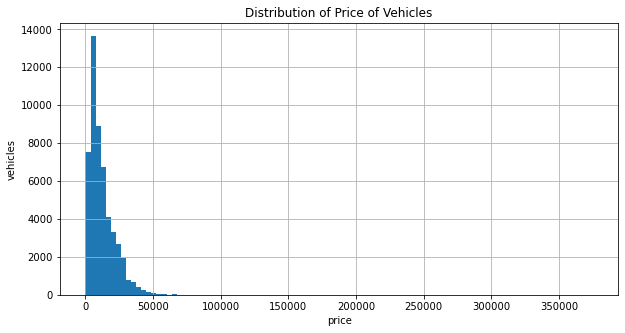

In [29]:
ad_data['price'].hist(bins=100, figsize=(10, 5))
plt.title('Distribution of Price of Vehicles')
plt.xlabel('price')
plt.ylabel('vehicles');

Based on the histogram, we can see that most cars are priced below USD50,000, however there are outliers that stretched the range up to USD400,000.

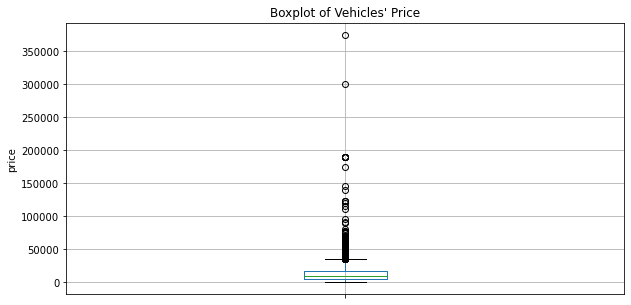

In [30]:
#take a closer look at the price using boxplot
ad_data['price'].plot(kind='box', figsize=(10,5), grid=True)
plt.title("Boxplot of Vehicles' Price")
plt.xticks([1], [])
plt.ylabel('price');

Looking at the boxplot, we can see that the upper quartile of cars price sits below USD50,000. Cars priced above USD100,000 are rare but there are outliers up to USD400,000. This may be just luxury car listings, so we can check the most expensive cars.

In [31]:
#check five most expensive cars
ad_data.sort_values('price', ascending=False).head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day,month,year,vehicle_age,avg_mileage
12504,375000,1999,nissan frontier,2,6,gas,115000,automatic,pickup,blue,1,2018-05-19,21,5,5,2018,19,6052
11359,300000,2015,ram 2500,3,6,diesel,103549,automatic,truck,grey,1,2018-10-15,39,0,10,2018,3,34516
1309,189000,2014,ford f-150,2,6,gas,151248,automatic,truck,black,0,2019-03-02,56,5,3,2019,5,30249
30634,189000,2014,ford f-150,2,6,gas,98000,automatic,truck,black,0,2018-07-21,42,5,7,2018,4,24500
34389,189000,2014,ford f-150,2,6,gas,151248,automatic,truck,black,0,2019-02-02,28,5,2,2019,5,30249


We can see that there are three models listed with really high price> Nissan Frontier, Ram 2500 and Ford F-150. It looks like a mistake on the listing as these cars are typically sold at USD25,000-40,000 in the market. We might have to filter the dataset later. Now, let's check the cheapest cars.

In [32]:
#check five cheapest cars
ad_data.sort_values('price').head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day,month,year,vehicle_age,avg_mileage
9176,1,2018,nissan rogue,3,4,gas,21855,automatic,SUV,silver,0,2018-06-12,51,1,6,2018,1,21855
45096,1,2018,chevrolet silverado 1500,3,8,gas,20627,automatic,truck,white,1,2018-09-23,14,6,9,2018,1,20627
14641,1,2018,chevrolet silverado 1500,3,8,gas,20627,automatic,truck,white,1,2018-11-05,56,0,11,2018,1,20627
11863,1,2013,chevrolet camaro,3,10,gas,28926,other,coupe,grey,1,2018-07-09,101,0,7,2018,5,5785
11862,1,2018,chevrolet camaro,3,10,gas,6886,manual,coupe,red,1,2018-08-29,31,2,8,2018,1,6886


There are cars priced at USD1, it's most definitely a mistake on entry. So we will check these cars with abnormally low price.

In [33]:
#check how many vehicles are less than 100 dollars
ad_data.loc[ad_data['price'] < 100, 'price'].count() / len(ad_data)

0.01676912302544549

It's only around 1.7% of the total rows in the dataset, so we will try to fix them.

In [34]:
#convert them to NaNs
ad_data.loc[ad_data['price'] < 100, 'price'] = np.nan

#fill in with median price of the same model and condition
ad_data['price'] = ad_data['price'].fillna(ad_data.groupby(['model', 'condition'])['price'].transform('median'))

#drop the remaining missing values and convert the price to integer
ad_data = ad_data.dropna(subset=['price'], axis=0)
ad_data['price'] = ad_data['price'].astype('int')

### Age

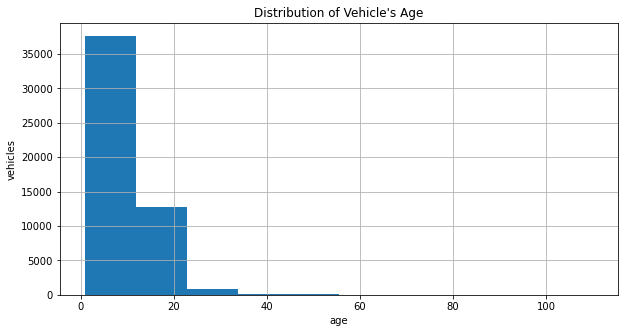

In [35]:
ad_data['vehicle_age'].hist(bins=10, figsize=(10,5))
plt.title("Distribution of Vehicle's Age")
plt.xlabel('age')
plt.ylabel('vehicles');

On the histogram, we can see that most vehicles are less than 20 years old. There are some older than that and the rest might just be outliers with vintage cars, let's take a look at the newer vehicles.

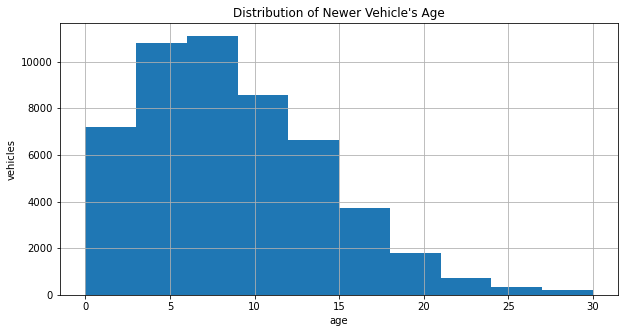

In [38]:
#take a closer look at newer vehicle's age
ad_data['vehicle_age'].hist(bins=10, range=(0,30), figsize=(10,5))
plt.title("Distribution of Newer Vehicle's Age")
plt.xlabel('age')
plt.ylabel('vehicles');

Most of the vehicles are around 1-12 years old. After 15 years old, the number decreases significantly.

In [39]:
#check five oldest cars
ad_data.sort_values('vehicle_age', ascending=False).head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day,month,year,vehicle_age,avg_mileage
33906,12995,1908,gmc yukon,2,8,gas,169328,automatic,SUV,black,0,2018-07-06,34,4,7,2018,110,1539
34713,5000,1936,ford f-150,3,6,gas,30000,manual,pickup,purple,0,2018-11-22,10,3,11,2018,82,365
22595,21000,1948,chevrolet impala,4,8,gas,4000,automatic,sedan,red,0,2019-01-18,24,4,1,2019,71,56
10018,23900,1955,ford f250,3,6,gas,47180,manual,truck,blue,0,2018-12-22,61,5,12,2018,63,748
48414,37900,1958,chevrolet impala,2,8,gas,62799,automatic,coupe,unknown,0,2018-08-11,10,5,8,2018,60,1046


We assume the oldest cars are vintage models but upon further check, it turns out that it may be a mistake on the listing as those models don't appear until later date, e.g. GMC Yukon's first model is made in 1992, Ford F-150 is first made in 1975 and Chevrolet Impala is in 1958. If needed, we would deal with this later on.

### Average Mileage

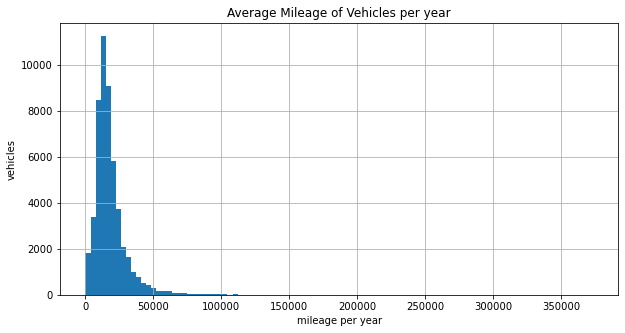

In [41]:
ad_data['avg_mileage'].hist(bins=100, figsize=(10, 5))
plt.title("Average Mileage of Vehicles per year")
plt.xlabel('mileage per year')
plt.ylabel('vehicles');

Most of the vehicles advertised have less than 50000 miles annually, but there may be outliers logging up to 400000 miles per year. We can check the lower range.

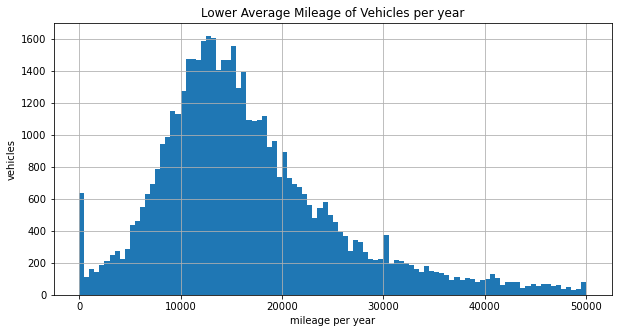

In [42]:
ad_data['avg_mileage'].hist(bins=100, range=(0,50000), figsize=(10, 5))
plt.title("Lower Average Mileage of Vehicles per year")
plt.xlabel('mileage per year')
plt.ylabel('vehicles');

There are a lot of vehicles having close to 0 miles annually, it might be the error in the odometer section. Other than that, most vehicles have 10,000-15,000 miles per year. This is in line with U.S. Department of Transportation's Federal Highway Administration's report, where the average person in the United States drives approximately 13,500 miles each year. 

In [43]:
ad_data.sort_values('avg_mileage').head(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day,month,year,vehicle_age,avg_mileage
12066,34999,1985,ford mustang,3,8,other,10,manual,hatchback,white,0,2019-04-01,2,0,4,2019,34,0
19150,475,2012,jeep wrangler,4,6,gas,10,automatic,SUV,green,1,2019-02-20,24,2,2,2019,7,1
27435,1995,2005,hyundai sonata,3,6,gas,15,automatic,sedan,red,0,2018-12-16,7,6,12,2018,13,1
18630,16900,1983,chevrolet silverado,4,8,gas,42,automatic,pickup,white,1,2018-08-07,51,1,8,2018,35,1
25242,32500,1968,chevrolet camaro,3,8,gas,99,automatic,other,yellow,0,2018-10-08,52,0,10,2018,50,1


Some of those vehicles with low average mileage are actually quite old (> 30 years). It might be caused by the faulty odometer amount, where people who put up the listings are not bothered to enter the correct odometer amount. 

### Cylinders

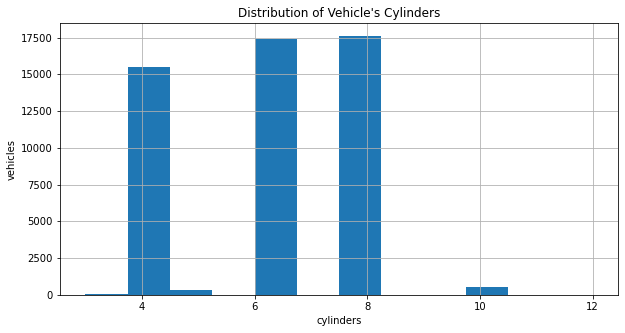

In [45]:
ad_data['cylinders'].hist(bins=12, figsize=(10,5))
plt.title("Distribution of Vehicle's Cylinders")
plt.xlabel('cylinders')
plt.ylabel('vehicles');

Most vehicles listed have the industry standard 4, 6 and 8 cylinders. But there are other cylinders too, it's probably modified, let's check it.

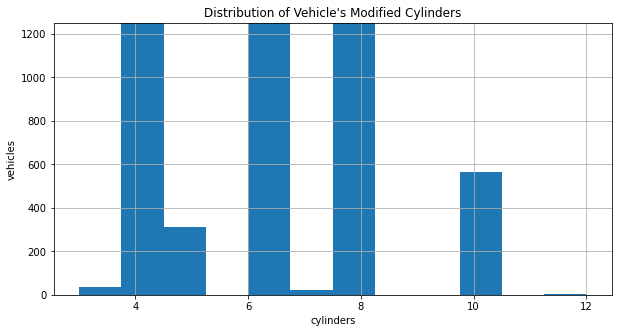

In [46]:
#check the amount of vehicles with modified engine cylinders
ad_data['cylinders'].plot(kind='hist', bins=12, figsize=(10,5), ylim=(0,1250), grid=True)
plt.title("Distribution of Vehicle's Modified Cylinders")
plt.xlabel('cylinders')
plt.ylabel('vehicles');

There are some vehicles with modified cylinders up to 12 cylinders, with most modified cylinders (> 400 vehicles) have 10 cylinders, followed by 5 cylinders (> 200 vehicles).

### Condition

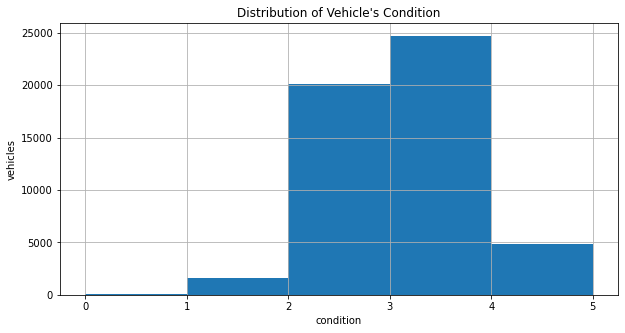

In [47]:
ad_data['condition'].hist(bins=5, figsize=(10, 5))
plt.title("Distribution of Vehicle's Condition")
plt.xlabel('condition')
plt.ylabel('vehicles');

Based on the histogram, we can see that most vehicles listed are in good or excellent condition. There are some vehicles which are in mint (new) condition, and lower amount of vehicles in fair or salvage condition. Let's zoom in and see how many of them.

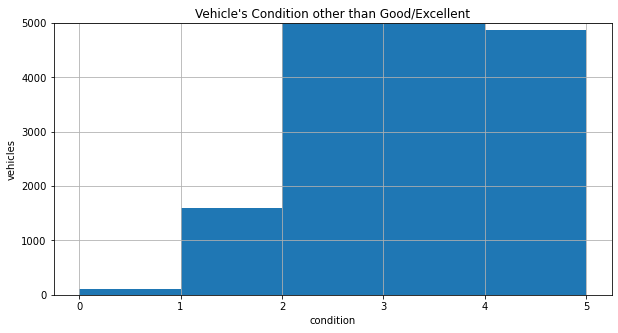

In [48]:
#check the amount of vehicles that are neither good nor excellent
ad_data['condition'].plot(kind='hist', bins=5, figsize=(10,5), ylim=(0,5000), grid=True)
plt.title("Vehicle's Condition other than Good/Excellent")
plt.xlabel('condition')
plt.ylabel('vehicles');

There are less than 5000 vehicles that are new, less than 2000 are fair and even lower amount are salvage.

### Listing Days

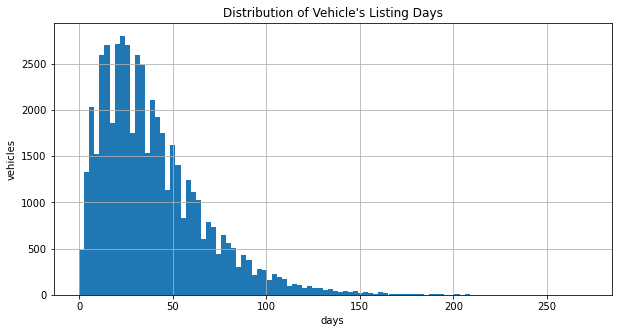

In [49]:
ad_data['days_listed'].hist(bins=100, figsize=(10,5))
plt.title("Distribution of Vehicle's Listing Days")
plt.xlabel('days')
plt.ylabel('vehicles');

We can see on the histogram that most vehicles are sold within the first 30-40 days since being listed. Most vehicles are not listed more than 100 days but there are some outliers up to 300 days.

In [53]:
print('The shortest listing is', ad_data['days_listed'].min(), 'days.')
print('The longest listing is', ad_data['days_listed'].max(), 'days.')

The shortest listing is 0 days.
The longest listing is 271 days.


There are some listings that are removed/sold the same day it was being listed, let's see how many of them are there.

In [60]:
#check how many ads were removed on the same day (0 listing days)
len(ad_data[ad_data['days_listed'] == 0])

54

In [61]:
ad_data[ad_data['days_listed'] == 0].head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day,month,year,vehicle_age,avg_mileage
1247,14995,2008,chevrolet silverado 1500,3,8,gas,93300,automatic,truck,grey,1,2018-05-15,0,1,5,2018,10,9330
1711,59589,2019,chevrolet silverado 2500hd,3,8,diesel,13000,automatic,truck,white,1,2019-01-13,0,6,1,2019,1,13000
1983,14000,1999,ford f250,3,8,diesel,137500,automatic,truck,red,1,2018-09-27,0,3,9,2018,19,7236
2883,4000,2004,ram 1500,3,8,gas,250000,automatic,truck,brown,1,2018-08-13,0,0,8,2018,14,17857
3965,16750,1985,chevrolet corvette,4,8,gas,24540,automatic,hatchback,white,0,2018-10-14,0,6,10,2018,33,743


It doesn't look like there is any pattern on what kind of vehicle gets listed off the same day as it was published. We can assume there was some error or mistake in the listing so the person who listed them decided to remove it and list a new one. If that is the case, we need to look if there is an option to edit listing after being uploaded. 

We are going to fix this by changing them to NaNs and fill with typical listing days of the same model and condition.

In [62]:
ad_data.loc[ad_data['days_listed'] == 0] = np.nan
ad_data['days_listed'] = ad_data['days_listed'].fillna(ad_data.groupby(['model', 'condition'])['days_listed'].transform('mean'))

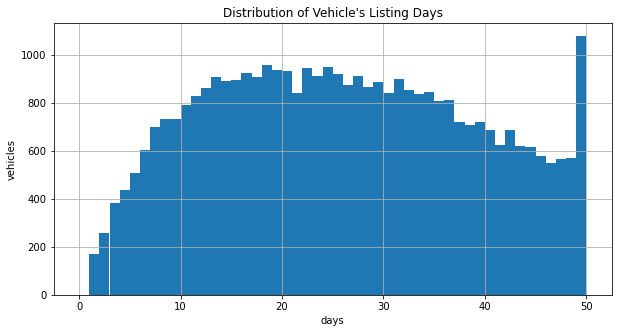

In [64]:
#take a closer look on lower listing days
ad_data['days_listed'].hist(bins=50, range=(0,50), figsize=(10,5))
plt.title("Distribution of Vehicle's Listing Days")
plt.xlabel('days')
plt.ylabel('vehicles');

There is a sudden spike on the 50 day mark, but the histogram also shows that most vehicles are listed for 10-40 days.

In [65]:
#check the description of listing days
ad_data['days_listed'].describe()

count    51349.000000
mean        39.599875
std         28.194966
min          1.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

On average, vehicles are listed for 40 days and the upper limit is around 53 days.

In [76]:
ad_data['slow_listing'] = ad_data['days_listed'] >= 53 # upper limit of listing days

#create a pivot table consisting the vehicle models that doesn't get sold fast enough
slow_stat = ad_data.pivot_table(index='model', values='slow_listing')
slow_stat = slow_stat.reset_index()
slow_stat['slow_listing'].describe()

count    99.000000
mean      0.257714
std       0.021538
min       0.199170
25%       0.243998
50%       0.256410
75%       0.269533
max       0.322097
Name: slow_listing, dtype: float64

On average, 25% of all vehicles listed of a certain model is slow to sell. Now, let's filter the models that have percentage lower than this.

In [91]:
slow_model = slow_stat.query('slow_listing >= 0.25')
slow_model.sort_values('slow_listing', ascending=False).head()

,model,slow_listing
1,bmw x5,0.322097
36,ford f-350 sd,0.316327
71,kia sorento,0.301724
8,chevrolet cruze,0.300439
17,chevrolet suburban,0.295170


The slowest model to sell is BMW X5, followed by Ford F-250 SD and Kia Sorento.

In [92]:
slow_data = ad_data.query('model in @slow_model.model')
slow_data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day,month,year,vehicle_age,avg_mileage,slow_listing
0,9400.0,2011.0,bmw x5,2.0,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19.0,5.0,6.0,2018.0,7.0,20714.0,False
2,5500.0,2013.0,hyundai sonata,4.0,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79.0,3.0,2.0,2019.0,6.0,18333.0,True
4,14900.0,2017.0,chrysler 200,3.0,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28.0,1.0,4.0,2019.0,2.0,40451.0,False
8,11500.0,2012.0,kia sorento,3.0,4.0,gas,104174.0,automatic,SUV,unknown,1.0,2018-07-16,19.0,0.0,7.0,2018.0,6.0,17362.0,False
10,19500.0,2011.0,chevrolet silverado 1500,3.0,8.0,gas,128413.0,automatic,pickup,black,1.0,2018-09-17,38.0,0.0,9.0,2018.0,7.0,18344.0,False


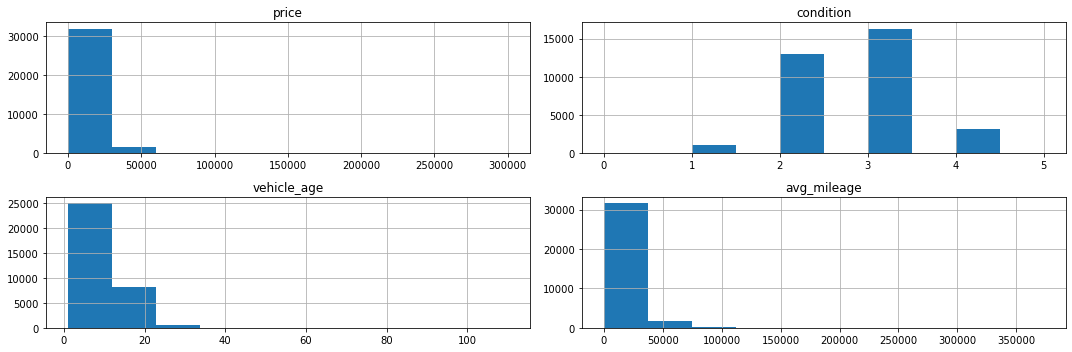

In [95]:
slow_data[['price', 'condition', 'vehicle_age', 'avg_mileage']].hist(figsize=(15,5))
plt.tight_layout();

We check some parameters about these models and it doesn't look like there's anything unusual about these vehicles because the histogram looks similar as the main dataset. It could be that most people just aren't looking for these models.

### Type

In [127]:
ad_data['type'].value_counts()
type_ads = ad_data.pivot_table(index='type', values='price', aggfunc=['count', 'mean']).reset_index()
type_ads.columns = ['type', 'ads', 'avg_price']
type_ads.sort_values('ads', ascending=False).head(3)

,type,ads,avg_price
0,SUV,12382,11410.292441
10,truck,12320,17204.954464
9,sedan,12122,7087.120772


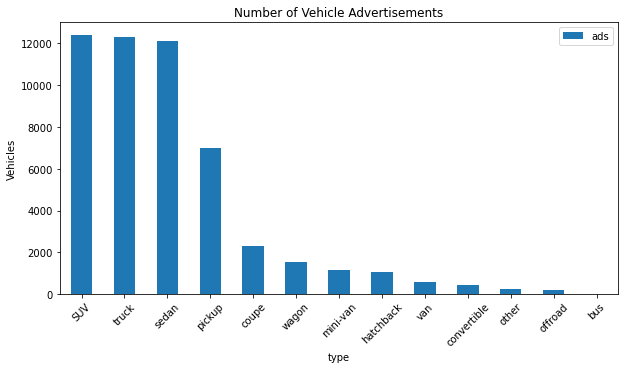

In [106]:
type_ads.sort_values('ads', ascending=False).plot(x='type', y='ads', kind='bar', figsize=(10,5))

plt.title('Number of Vehicle Advertisements')
plt.ylabel('Vehicles')
plt.xticks(rotation=45);

We can see on the table and the chart above that SUV, truck and sedan are the most listed vehicle types. Pickup listing amount is around half of the top 3 vehicle types' amount. Other types are really low in comparison, having 2000 listings or less.

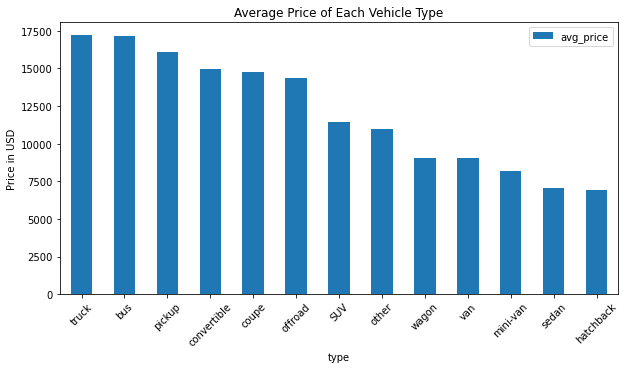

In [108]:
type_ads.sort_values('avg_price', ascending=False).plot(x='type', y='avg_price', kind='bar', figsize=(10,5))

plt.title('Average Price of Each Vehicle Type')
plt.ylabel('Price in USD')
plt.xticks(rotation=45);

Truck has the highest average listing price of all vehicle types, followed by bus and pickup.

### Removing Outliers

Based on the previous analysis, there are still many outliers, so we will filter the dataset from them and conduct further analysis with filtered data. The variables for filtering are:
1. Price and Age: we want to analyse listings with common price and age, as previous analysis suggests that the higher price or older age aren't necessarily luxury and vintage vehicles but more of listing mistake.
2. Odometer: we want to analyse listings with reasonable odometer, the amount that is too big or too small aren't a good reflection of market's common vehicles condition.
3. Days Listed: we want to analyse listings that aren't removed to quickly or listed for too long, as those aren't a good reflection of how vehicle market works.

In [109]:
Q1 = ad_data[['vehicle_age','odometer','days_listed', 'price']].quantile(0.25)
Q3 = ad_data[['vehicle_age','odometer','days_listed', 'price']].quantile(0.75)
IQR = Q3 - Q1
lower_outlier = Q1 - 1.5 * IQR
upper_outlier = Q3 + 1.5 * IQR
print("The inter-quartile ranges are - vehicle's age: {}, odometer: {}, listing days: {}, and price: {}".format(*IQR))
print()
print("The upper limits are - vehicle's age: {}, odometer: {}, listing days: {}, and price: {}".format(*upper_outlier))
print()
print("The lower limits are - vehicle's age: {}, odometer: {}, listing days: {}, and price: {}".format(*lower_outlier))

The inter-quartile ranges are - vehicle's age: 8.0, odometer: 81000.0, listing days: 34.0, and price: 11450.0

The upper limits are - vehicle's age: 24.0, odometer: 275500.0, listing days: 104.0, and price: 34075.0

The lower limits are - vehicle's age: -8.0, odometer: -48500.0, listing days: -32.0, and price: -11725.0


In [111]:
#filtering outliers

filter = np.zeros(len(ad_data), dtype=bool) + True
for listing in ['vehicle_age','odometer','days_listed', 'price']:
    Q1 = ad_data[listing].quantile(0.25)
    Q3 = ad_data[listing].quantile(0.75)
    IQR = Q3 - Q1
    upper_outlier = Q3 + 1.5 * IQR
    filter[np.where(ad_data[listing] > upper_outlier)] = False
    
data_filtered = ad_data[filter]
data_filtered = data_filtered.dropna()
data_filtered.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day,month,year,vehicle_age,avg_mileage,slow_listing
0,9400.0,2011.0,bmw x5,2.0,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19.0,5.0,6.0,2018.0,7.0,20714.0,False
1,25500.0,2008.0,ford f-150,2.0,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50.0,4.0,10.0,2018.0,10.0,8870.0,False
2,5500.0,2013.0,hyundai sonata,4.0,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79.0,3.0,2.0,2019.0,6.0,18333.0,True
3,1500.0,2003.0,ford f-150,1.0,8.0,gas,177500.0,automatic,pickup,unknown,0.0,2019-03-22,9.0,4.0,3.0,2019.0,16.0,11093.0,False
4,14900.0,2017.0,chrysler 200,3.0,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28.0,1.0,4.0,2019.0,2.0,40451.0,False


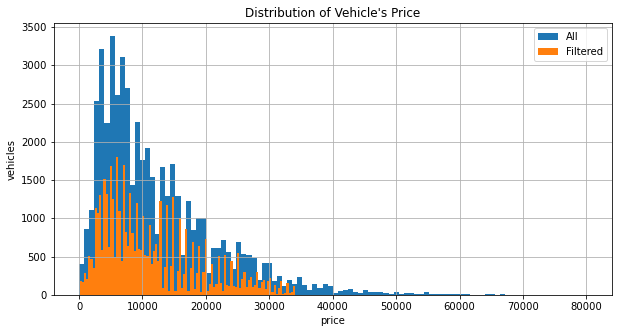

In [113]:
ad_data['price'].hist(bins=100, figsize=(10,5), range=(0,80000), label='All')
data_filtered['price'].hist(bins=100, figsize=(10,5), label='Filtered')

plt.title("Distribution of Vehicle's Price")
plt.xlabel('price')
plt.ylabel('vehicles')
plt.legend();

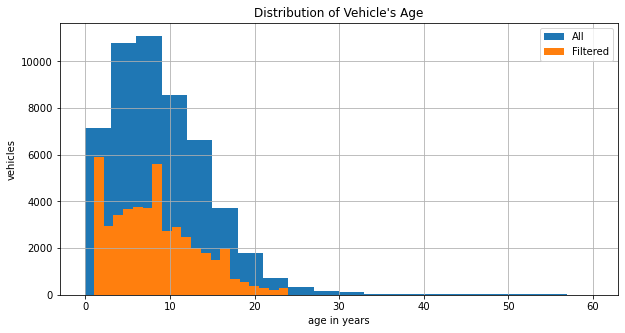

In [114]:
ad_data['vehicle_age'].hist(bins=20, figsize=(10,5), range=(0,60), label='All')
data_filtered['vehicle_age'].hist(bins=20, figsize=(10,5), label='Filtered')

plt.title("Distribution of Vehicle's Age")
plt.xlabel('age in years')
plt.ylabel('vehicles')
plt.legend();

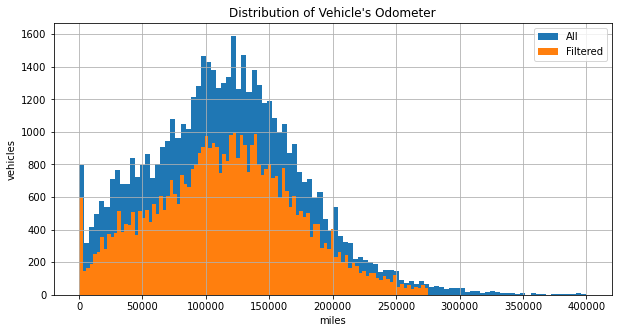

In [115]:
ad_data['odometer'].hist(bins=100, figsize=(10,5), range=(0,400000), label='All')
data_filtered['odometer'].hist(bins=100, figsize=(10,5), label='Filtered')

plt.title("Distribution of Vehicle's Odometer")
plt.xlabel('miles')
plt.ylabel('vehicles')
plt.legend();

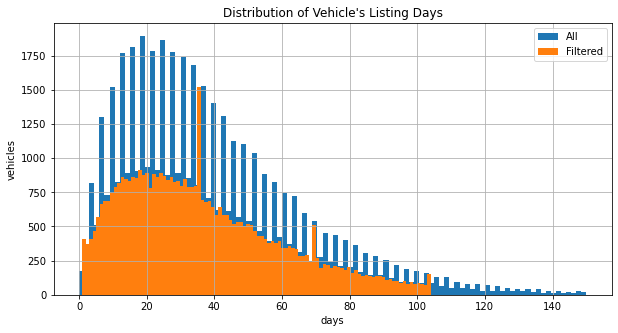

In [116]:
ad_data['days_listed'].hist(bins=100, figsize=(10,5), range=(0,150), label='All')
data_filtered['days_listed'].hist(bins=100, figsize=(10,5), label='Filtered')

plt.title("Distribution of Vehicle's Listing Days")
plt.xlabel('days')
plt.ylabel('vehicles')
plt.legend();

### Conclusion

After filtering the dataset with the parameters above, the histograms show that:
1. Price: the peak compared to the rest of the data is not so significant anymore, this indicates that the distribution of price in the filtered dataset is more even compared to the original dataset.
2. Age: in the filtered dataset, there are 2 significant peaks close to 0 and towards 10, the distribution is less even than on the original dataset.
3. Odometer: the shape of the histogram of the filtered dataset is exactly the same, although a bit smaller, with the original dataset, so there wasn't many changes during the filtering process and it just removes the outliers.
4. Listing Days: aside from 2 significant peaks close to 40 and another one around 70, the distribution of listing days in the filtered dataset is more even than the original dataset.

## Analysis of Price Determining Factors
<a name="factors"></a>

The dataset are filtered and the most advertised vehicle types are discovered, now we can analyse the factors that determine the price of a vehicle. For this analysis, we will plot the price against quantitative and categorical variables. We will also just choose the most listed vehicle types to simplify the analysis.

In [128]:
#check the most popular types in filtered data
filtered_type_ads = data_filtered.pivot_table(index='type', values='price', aggfunc=['count', 'mean']).reset_index()
filtered_type_ads.columns = ['type', 'ads', 'avg_price']
filtered_type_ads.sort_values('ads', ascending=False).head(3)

,type,ads,avg_price
9,sedan,11649,7086.547944
0,SUV,11513,10662.965170
10,truck,10830,15570.860849


The most listed vehicles in the filtered dataset is sedan and SUV. We will first check the price compared to the vehicle's age.

In [134]:
#slicing to 2 new dataframes the relevant rows with SUV and sedan
suv = data_filtered.query('type=="SUV"')
sedan = data_filtered.query('type=="sedan"')

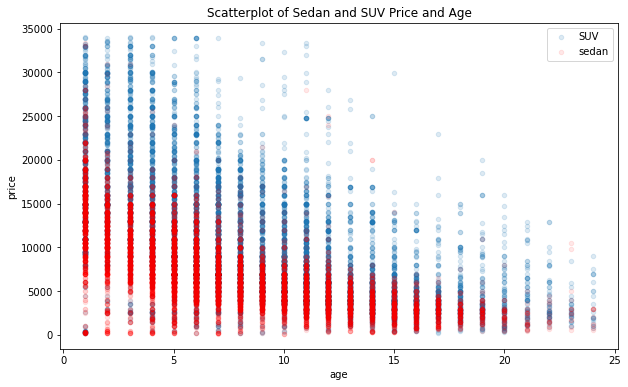

In [135]:
#creating scatterplot for age vs. price for both SUV and sedan
SUV_plt = suv.plot(x='vehicle_age', y='price', kind='scatter', alpha=0.15, label='SUV', figsize=(10,6))
sedan_plt = sedan.plot(x='vehicle_age', y='price', kind='scatter', alpha=0.09, label='sedan',color='r', ax=SUV_plt, figsize=(10,6))

plt.title('Scatterplot of Sedan and SUV Price and Age')
plt.xlabel('age')
plt.show();

The price and age dependency looks quite similar between SUV and sedan, the older the vehicle, the cheaper it will be.

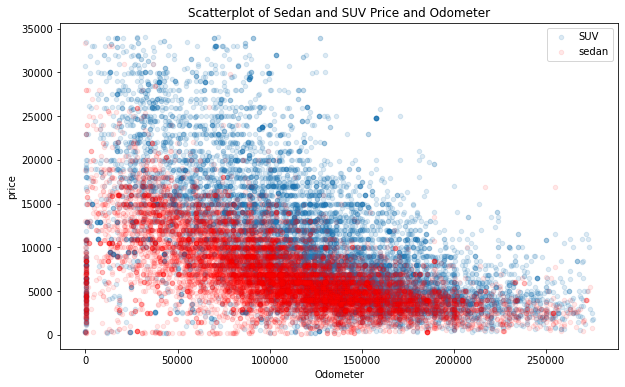

In [140]:
SUV_plt = suv.plot(x='odometer', y='price', kind='scatter', alpha=0.15, label='SUV', figsize=(10,6))
sedan_plt = sedan.plot(x='odometer', y='price', kind='scatter', alpha=0.09, label='sedan',color='r', ax=SUV_plt, figsize=(10,6))

plt.title('Scatterplot of Sedan and SUV Price and Odometer')
plt.xlabel('Odometer')
plt.show();

The price and age is also quite similar between sedan and SUV, the higher the mileage is, the cheaper the vehicle. although there are many cars with odometer close to 0, the rest makes more sense. 

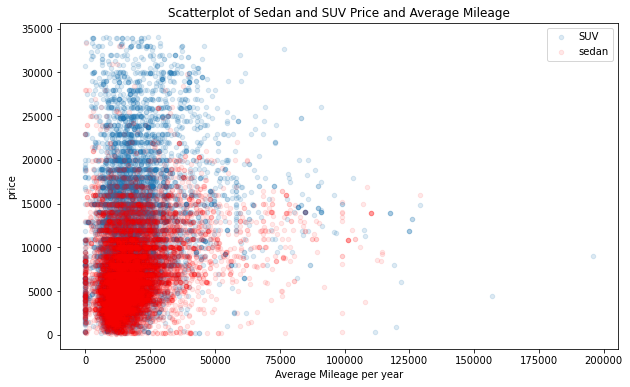

In [142]:
SUV_plt = suv.plot(x='avg_mileage', y='price', kind='scatter', alpha=0.15, label='SUV', figsize=(10,6))
sedan_plt = sedan.plot(x='avg_mileage', y='price', kind='scatter', alpha=0.09, label='sedan',color='r', ax=SUV_plt, figsize=(10,6))

plt.title('Scatterplot of Sedan and SUV Price and Average Mileage')
plt.xlabel('Average Mileage per year')
plt.show();

There is quite a difference in terms of average mileage between SUV and sedan. The SUV has higher prices while the sedan is quite concentrated in the lower end of both the price and average mileage.

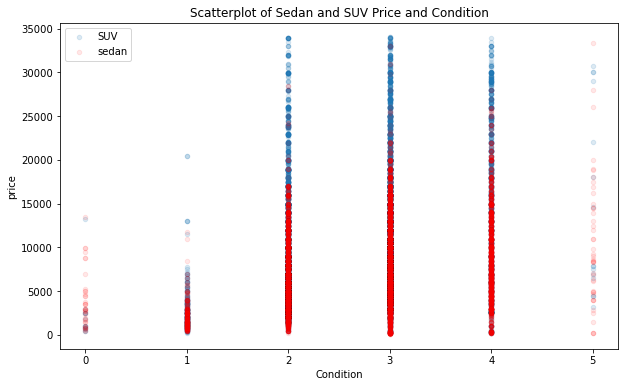

In [143]:
SUV_plt = suv.plot(x='condition', y='price', kind='scatter', alpha=0.15, label='SUV', figsize=(10,6))
sedan_plt = sedan.plot(x='condition', y='price', kind='scatter', alpha=0.09, label='sedan',color='r', ax=SUV_plt, figsize=(10,6))

plt.title('Scatterplot of Sedan and SUV Price and Condition')
plt.xlabel('Condition')
plt.show();

It looks like sedan's condition are more varied while SUV is mostly having fair, good and excellent condition.

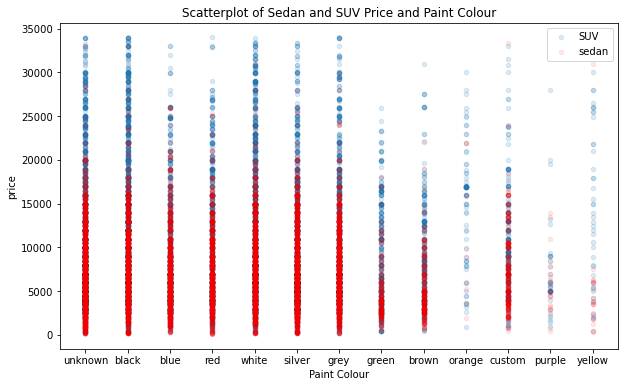

In [145]:
SUV_plt = suv.plot(x='paint_color', y='price', kind='scatter', alpha=0.15, label='SUV', figsize=(10,6))
sedan_plt = sedan.plot(x='paint_color', y='price', kind='scatter', alpha=0.09, label='sedan',color='r', ax=SUV_plt, figsize=(10,6))

plt.title('Scatterplot of Sedan and SUV Price and Paint Colour')
plt.xlabel('Paint Colour')
plt.show();

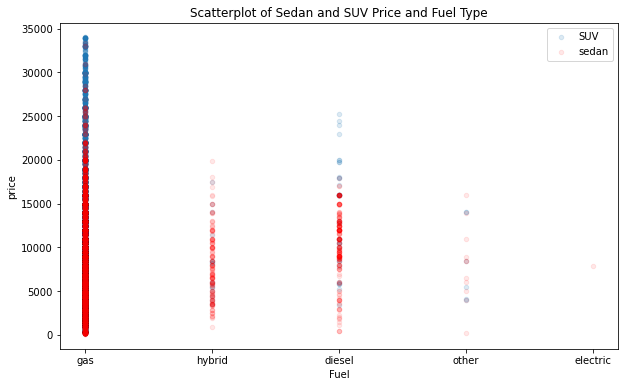

In [146]:
SUV_plt = suv.plot(x='fuel', y='price', kind='scatter', alpha=0.15, label='SUV', figsize=(10,6))
sedan_plt = sedan.plot(x='fuel', y='price', kind='scatter', alpha=0.09, label='sedan',color='r', ax=SUV_plt, figsize=(10,6))

plt.title('Scatterplot of Sedan and SUV Price and Fuel Type')
plt.xlabel('Fuel')
plt.show();

## Overall conclusion
<a name="cons"></a>

This report serves as an analysis of vehicle advertisements that will help Crankshaft List executives to decide which factor determines the price of a vehicle. Through the analysis, we have discovered correlations between various variables in the vehicle's data and the price.

The analysis was done in these steps:

1. Looking at the general information in the dataset
2. Preprocessing the dataset by replacing or removing missing values and outliers
3. Changing data types, categorising and creating new variables to conduct the exploratory data analysis

Finally, we came to the following conclusions:
1. As expected, the older a vehicle is, the cheaper it will be. The same goes for both sedan and SUV.
2. As expected, the higher the mileage of a vehicle, the cheaper it will be. That is reflected in each sedan and SUV graphs. Although it isn't really reflected in the average mileage, where there are a lot of cheap vehicles with average mileage (around 10,000-20,000 miles per year).
3. It was also assumed that the better the condition of a vehicle, the more expensive it will be. It's not always the case as there are vehicles with good/excellent condition that costs more than those with like new condition. It could be because the model is more expensive when initially bought.
4. Vehicles with industry standard cylinders (4, 6 and 8) have this visible pattern that the more cylinder a vehicle has, the more expensive it will be.
5. As expected, vehicles with manual transmission cost less than automatic ones. The ones with "other" transmission type costs more than those two, but there are only 340 out of 22,000+ data so it may not be an accurate representation. Sedan has more automatic transmission and SUV has more manual transmission.
6. There is no visible pattern in the colour boxplot graph other than that purple vehicles cost less than other colors. Therefore, colour may not be a good determining factor of vehicle's pricing.
7. Hybrid and gas fuel vehicles have similar prices, diesel is a bit expensive and electric has too little data to be analysed.
8. 4WD vehicles are more expensive than non-4WD.

To summarise, the following parameters can be a good indicator of vehicle's pricing:
- vehicle's age
- transmission type
- gas type
- 4WD